# Python Homework 1

**Release date:** Thursday, October 12<br>
**Due date:** Wednesday, October 25, at midnight via Gradescope

**Instruction:** Please upload your jupyter notebook on GauchoSpace with filename __PythonHW1_YOURPERMNUMBER.ipynb__.

Load some packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1 (5 Points)

1. Implement the simulation of a Poisson process $(N_t)_{0 \leq t \leq 100}$ with parameter $\lambda = 0.2$ on the time interval $[0,100]$.


In [2]:
np.random.seed(1025)

def get_N(n, delta_t,lam):
    # Generate an array of length n from a Poisson distribution
    return np.random.poisson(lam * delta_t, n)


2. Plot a trajectory of your simulated process from part 1 using one of the three methods we saw in class.


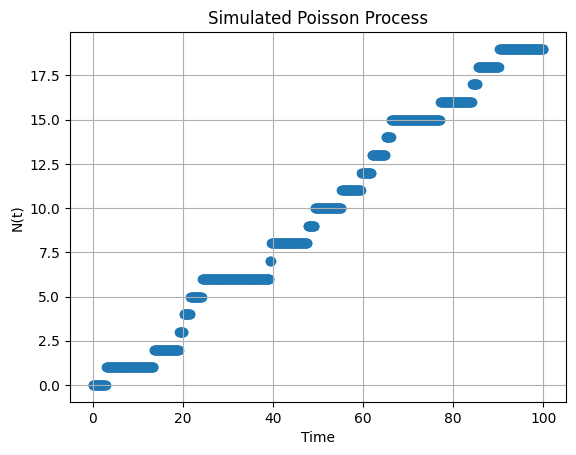

In [3]:
# Split interval [0,T] into n small subintervals of length $\delta_t = \frac{T}{n}$
T = 100
n = 1000  # Number of intervals
delta_t = T/n
lam = 0.2
# Generate n i.i.d. Poisson random variables $\delta_N1, \delta_N2, . . . , \delta_Nn$ with parameter/$\lambda$/$\delta_t$.
delta_N = get_N(n, delta_t,lam)

# Compute N
N = np.zeros(n+1)
for i in range(n):
    N[i+1] = N[i] + delta_N[i]

# Plotting the process
t_values = np.linspace(0, T, n+1)
plt.scatter(t_values, N)
plt.title('Simulated Poisson Process')
plt.xlabel('Time')
plt.ylabel('N(t)')
plt.grid(True)
plt.show()

## Problem 2 (5 Points)

1. Simulate a __compound Poisson process__ $(C_t)_{0 \leq t \leq 50}$ (see __Lecture 5__) with parameter $\lambda=1/2$ on the time interval $[0,50]$ where the jumps $Y_1, Y_2, \ldots$ are given as random variables

$$ Y_i = e^{Z_i} \qquad (i = 1,2,\ldots)$$

with $Z_1, Z_2, \ldots$ i.i.d. normally distributed random variables with mean 0 and variance 1 (also independent of the underlying Poisson process $(N_t)_{0 \leq t \leq 50}$). Plot a trajectory of your simulated process.

*Hint*: Use your method from Problem 1 to simulate the underlying Poisson Process $(N_t)_{0 \leq t \leq 50}$ driving the compound Poisson process $(C_t)_{0 \leq t \leq 50}$.

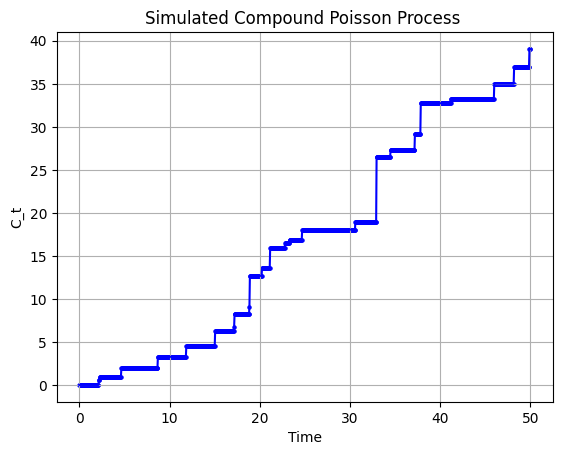

In [4]:
# Split interval [0,T] into n small subintervals of length delta_t = T/n
T = 50
n = 1000
delta_t = T/n
lam = 0.5
delta_N = get_N(n, delta_t, lam)

# Simulate the compound Poisson process
C = np.zeros(n+1) # define empty list to save random variables

# loop
for i in range(n):
    # For each jump, add the corresponding Y value to C(t)
    for _ in range(delta_N[i]):
        C[i+1] += np.exp(np.random.normal(0, 1)) # Z_t generate from Gaussian WN(0,1)
    C[i+1] += C[i]

# Plotting the process
t_values = np.linspace(0, T, n+1)
plt.scatter(t_values, C, s=5, color='blue')
plt.plot(t_values, C, '-', color='blue')
plt.title('Simulated Compound Poisson Process ')
plt.xlabel('Time')
plt.ylabel('C_t')
plt.grid(True)
plt.show()


2. Simulate $M=10000$ times the compound Poisson process from part 1 and compute the empricial mean and variance of your samples for the random variable $C_{50}$. Compare your empricial values with the exact theoretical values which are given by

$$\mathbb{E}[C_{50}] = \mathbb{E}[N_{50}] \cdot \mathbb{E}[Y_1] \qquad \text{and} \qquad \text{Var}(C_{50}) = \mathbb{E}[N_{50}] \cdot \mathbb{E}[Y^2_1].$$

*Hint*: Recall that
$$\mathbb{E}[e^{Z_1}] = e^{0.5} \qquad \text{and} \qquad  \mathbb{E}[(e^{Z_1})^2] = e^2.$$

In [5]:
def simulate_C(n, delta_t):
    delta_N = get_N(n, delta_t,lam) # generate Poisson random variable
    C = np.zeros(n+1)
    for i in range(n):
        for _ in range(delta_N[i]):
            C[i+1] += np.exp(np.random.normal(0, 1))
        C[i+1] += C[i]
    return C[-1]

M = 10000
T = 50
n = 1000
delta_t = T/n
lam = 0.5

samples = [simulate_C(n, delta_t) for _ in range(M)]
empirical_mean = np.mean(samples)
empirical_variance = np.var(samples, ddof=1)

print("Empirical Mean of C_50: {}".format(empirical_mean))
print("Empirical Variance of C_50: {}".format(empirical_variance))


Empirical Mean of C_50: 41.34789471087733
Empirical Variance of C_50: 187.23941829669354


In [6]:
# Compute theoretical mean and variance using the given formulas
E_Y1 = np.exp(0.5)
E_Y1_squared = np.exp(2)
E_N50 = 0.5 * T

theor_mean = E_N50 * E_Y1
theor_variance = E_N50 * E_Y1_squared

print("Theoretical Mean of C_50: {:.4f}".format(theor_mean))
print("Theoretical Variance of C_50: {:.4f}".format(theor_variance))

Theoretical Mean of C_50: 41.2180
Theoretical Variance of C_50: 184.7264
